In [1]:
import pandas as pd
import os
import re
import keras
from keras import layers
from keras import ops
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding, Bidirectional,Dropout
import torch
from torch.utils.data import Dataset,DataLoader


In [2]:
folders = os.listdir("C:/Users/ryand/OneDrive/Desktop/Stock-Market-Prediction-AI-Model/Stock Data/CSVs/Raw CSVs/Top 8 to 10 Performing Stocks All Subsectors July01_2022 - Oct22_2024")
folders

['AAPL_daily_data.csv',
 'ABBV_daily_data.csv',
 'ADBE_daily_data.csv',
 'AEP_daily_data.csv',
 'AMGN_daily_data.csv',
 'AMT_daily_data.csv',
 'AMZN_daily_data.csv',
 'APD_daily_data.csv',
 'AVB_daily_data.csv',
 'AXP_daily_data.csv',
 'BAC_daily_data.csv',
 'BA_daily_data.csv',
 'BKNG_daily_data.csv',
 'BP_daily_data.csv',
 'BRK.B_daily_data.csv',
 'CAT_daily_data.csv',
 'CL_daily_data.csv',
 'COP_daily_data.csv',
 'COST_daily_data.csv',
 'CRM_daily_data.csv',
 'CVX_daily_data.csv',
 'C_daily_data.csv',
 'DD_daily_data.csv',
 'DE_daily_data.csv',
 'DLR_daily_data.csv',
 'DUK_daily_data.csv',
 'D_daily_data.csv',
 'ED_daily_data.csv',
 'EQIX_daily_data.csv',
 'EXC_daily_data.csv',
 'FCX_daily_data.csv',
 'GOOGL_daily_data.csv',
 'GS_daily_data.csv',
 'HAL_daily_data.csv',
 'HD_daily_data.csv',
 'HON_daily_data.csv',
 'IP_daily_data.csv',
 'JNJ_daily_data.csv',
 'JPM_daily_data.csv',
 'KO_daily_data.csv',
 'LIN_daily_data.csv',
 'LLY_daily_data.csv',
 'LMT_daily_data.csv',
 'LOW_daily_d

In [3]:
files = os.listdir(f"Top 8 to 10 Performing Stocks All Subsectors July01_2022 - Oct22_2024/")
#print(files)
# load each file
all_year_data = pd.DataFrame()
for file in files:
    print (file)
    if ".csv" in file:
        data = pd.read_csv(f"Top 8 to 10 Performing Stocks All Subsectors July01_2022 - Oct22_2024/{file}")
        ticker_name = re.findall('(\w*)_daily_data\.csv', file)[0]
        data = data.assign(Ticker=ticker_name)
        all_year_data = pd.concat([all_year_data, data])

all_year_data

AAPL_daily_data.csv
ABBV_daily_data.csv
ADBE_daily_data.csv
AEP_daily_data.csv
AMGN_daily_data.csv
AMT_daily_data.csv
AMZN_daily_data.csv
APD_daily_data.csv
AVB_daily_data.csv
AXP_daily_data.csv
BAC_daily_data.csv
BA_daily_data.csv
BKNG_daily_data.csv
BP_daily_data.csv
BRK.B_daily_data.csv
CAT_daily_data.csv
CL_daily_data.csv
COP_daily_data.csv
COST_daily_data.csv
CRM_daily_data.csv
CVX_daily_data.csv
C_daily_data.csv
DD_daily_data.csv
DE_daily_data.csv
DLR_daily_data.csv
DUK_daily_data.csv
D_daily_data.csv
ED_daily_data.csv
EQIX_daily_data.csv
EXC_daily_data.csv
FCX_daily_data.csv
GOOGL_daily_data.csv
GS_daily_data.csv
HAL_daily_data.csv
HD_daily_data.csv
HON_daily_data.csv
IP_daily_data.csv
JNJ_daily_data.csv
JPM_daily_data.csv
KO_daily_data.csv
LIN_daily_data.csv
LLY_daily_data.csv
LMT_daily_data.csv
LOW_daily_data.csv
MCD_daily_data.csv
MDLZ_daily_data.csv
META_daily_data.csv
MMM_daily_data.csv
MRK_daily_data.csv
MRNA_daily_data.csv
MSFT_daily_data.csv
MS_daily_data.csv
NEE_daily_d

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker
0,2024-10-22,233.885,236.22,232.60,235.86,235.860000,38846578.0,0.0,1.0,AAPL
1,2024-10-21,234.450,236.85,234.45,236.48,236.480000,36254470.0,0.0,1.0,AAPL
2,2024-10-18,236.180,236.18,234.01,235.00,235.000000,46431472.0,0.0,1.0,AAPL
3,2024-10-17,233.430,233.85,230.52,232.15,232.150000,32993810.0,0.0,1.0,AAPL
4,2024-10-16,231.600,232.12,229.84,231.78,231.780000,34082240.0,0.0,1.0,AAPL
...,...,...,...,...,...,...,...,...,...,...
6279,1999-11-05,73.000,73.00,70.06,70.62,16.143723,7173300.0,0.0,1.0,XOM
6280,1999-11-04,73.690,73.94,72.50,73.00,16.687791,3636000.0,0.0,1.0,XOM
6281,1999-11-03,74.620,74.62,72.56,73.00,16.687791,3738600.0,0.0,1.0,XOM
6282,1999-11-02,74.370,75.19,73.94,74.12,16.943822,2950100.0,0.0,1.0,XOM


In [4]:
all_year_data['Daily_Change_In_Price'] = (all_year_data['4. close'] - all_year_data['4. close'].shift(1)) / all_year_data['4. close'].shift(1)
all_year_data

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,Daily_Change_In_Price
0,2024-10-22,233.885,236.22,232.60,235.86,235.860000,38846578.0,0.0,1.0,AAPL,NaN
1,2024-10-21,234.450,236.85,234.45,236.48,236.480000,36254470.0,0.0,1.0,AAPL,0.002629
2,2024-10-18,236.180,236.18,234.01,235.00,235.000000,46431472.0,0.0,1.0,AAPL,-0.006258
3,2024-10-17,233.430,233.85,230.52,232.15,232.150000,32993810.0,0.0,1.0,AAPL,-0.012128
4,2024-10-16,231.600,232.12,229.84,231.78,231.780000,34082240.0,0.0,1.0,AAPL,-0.001594
...,...,...,...,...,...,...,...,...,...,...,...
6279,1999-11-05,73.000,73.00,70.06,70.62,16.143723,7173300.0,0.0,1.0,XOM,-0.049657
6280,1999-11-04,73.690,73.94,72.50,73.00,16.687791,3636000.0,0.0,1.0,XOM,0.033702
6281,1999-11-03,74.620,74.62,72.56,73.00,16.687791,3738600.0,0.0,1.0,XOM,0.000000
6282,1999-11-02,74.370,75.19,73.94,74.12,16.943822,2950100.0,0.0,1.0,XOM,0.015342


In [5]:
all_year_data['Binary_Returns'] = all_year_data['Daily_Change_In_Price'].apply(lambda x: 1 if x > 0 else 0)

In [6]:
all_year_data["date"] = pd.to_datetime(all_year_data['date'])
all_year_data.set_index("date",inplace=True) 
all_year_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464987 entries, 2024-10-22 to 1999-11-01
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   1. open                464987 non-null  float64
 1   2. high                464987 non-null  float64
 2   3. low                 464987 non-null  float64
 3   4. close               464987 non-null  float64
 4   5. adjusted close      464987 non-null  float64
 5   6. volume              464987 non-null  float64
 6   7. dividend amount     464987 non-null  float64
 7   8. split coefficient   464987 non-null  float64
 8   Ticker                 464987 non-null  object 
 9   Daily_Change_In_Price  464986 non-null  float64
 10  Binary_Returns         464987 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 42.6+ MB


# Apple

In [7]:
apple_df = all_year_data[all_year_data["Ticker"]=='AAPL']
apple_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,Daily_Change_In_Price,Binary_Returns
date,,,,,,,,,,,
2024-10-22,233.885,236.22,232.60,235.86,235.860000,38846578.0,0.0,1.0,AAPL,NaN,0
2024-10-21,234.450,236.85,234.45,236.48,236.480000,36254470.0,0.0,1.0,AAPL,0.002629,1
2024-10-18,236.180,236.18,234.01,235.00,235.000000,46431472.0,0.0,1.0,AAPL,-0.006258,0
2024-10-17,233.430,233.85,230.52,232.15,232.150000,32993810.0,0.0,1.0,AAPL,-0.012128,0
2024-10-16,231.600,232.12,229.84,231.78,231.780000,34082240.0,0.0,1.0,AAPL,-0.001594,0
...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,84.620,88.37,84.00,88.31,0.665793,3721500.0,0.0,1.0,AAPL,-0.083636,0
1999-11-04,82.060,85.37,80.62,83.62,0.630434,3384700.0,0.0,1.0,AAPL,-0.053108,0
1999-11-03,81.620,83.25,81.00,81.50,0.614450,2932700.0,0.0,1.0,AAPL,-0.025353,0


In [8]:
apple_df= apple_df.drop("Ticker",axis=1) 

In [9]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

# Applying the indicators to apple_df
calculate_rsi(apple_df)
calculate_ppo(apple_df)
calculate_roc(apple_df)
calculate_williams_r(apple_df)
calculate_stochastic(apple_df)

In [10]:
apple_df = apple_df.dropna()

In [11]:
apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K', '%D',"Binary_Returns"]].corr()

,RSI,PPO,ROC,Williams_%R,%K,%D,Binary_Returns
RSI,1.000000,0.556803,0.421147,0.809463,0.809463,0.858918,0.214950
PPO,0.556803,1.000000,0.768488,0.406281,0.406281,0.470448,0.033242
ROC,0.421147,0.768488,1.000000,0.301251,0.301251,0.324340,0.045461
Williams_%R,0.809463,0.406281,0.301251,1.000000,1.000000,0.918330,0.366259
%K,0.809463,0.406281,0.301251,1.000000,1.000000,0.918330,0.366259
%D,0.858918,0.470448,0.324340,0.918330,0.918330,1.000000,0.131719
Binary_Returns,0.214950,0.033242,0.045461,0.366259,0.366259,0.131719,1.000000


In [70]:
import seaborn as sns

<Axes: >

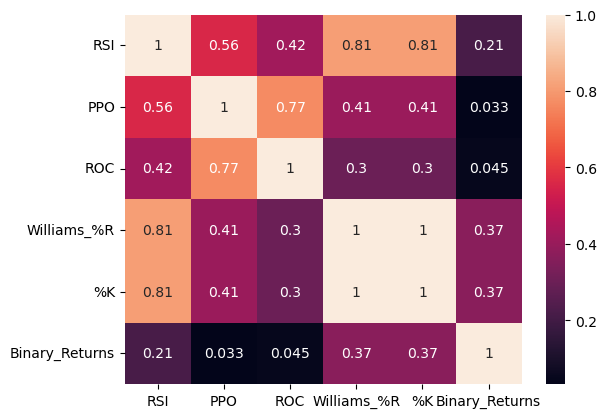

In [71]:

sns.heatmap(apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K',"Binary_Returns"]].corr(), annot=True)

In [13]:
X = apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K','%D']]
y = apple_df["Binary_Returns"]

In [15]:
y.value_counts()

Binary_Returns
0    3300
1    2969
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [17]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Import our dependencies
import pandas as pd
import sklearn as skl
import tensorflow as tf



In [19]:
X_train_scaled.shape

(5015, 6)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
len(X.columns)

6

In [22]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=12, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.4841 - loss: 0.7672
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.6222 - loss: 0.6703
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.6323 - loss: 0.6526
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.6327 - loss: 0.6433
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.6550 - loss: 0.6251
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.6829 - loss: 0.6037
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7067 - loss: 0.5780
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7366 - loss: 0.5513
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7530 - loss: 0.5281
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.7721 - loss: 0.5005
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7967 - loss: 0.4711
Epoch 12/25
157/157 ━━━━━━━━━━━━

In [24]:
fit_model.history["accuracy"]

[0.4899302124977112,
 0.6259222626686096,
 0.6315054893493652,
 0.6416749954223633,
 0.6560319066047668,
 0.6841475367546082,
 0.7162512540817261,
 0.738185465335846,
 0.7643070816993713,
 0.7804586291313171,
 0.7982053756713867,
 0.8085742592811584,
 0.8147557377815247,
 0.8175473809242249,
 0.8181455731391907,
 0.8193419575691223,
 0.8189431428909302,
 0.8199401497840881,
 0.8189431428909302,
 0.8209372162818909,
 0.8183449506759644,
 0.8187437653541565,
 0.8185443878173828,
 0.8213359713554382,
 0.8185443878173828]

<Axes: >

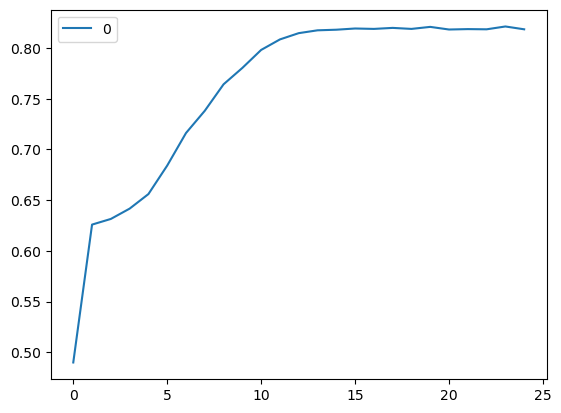

In [25]:
pd.DataFrame(fit_model.history["accuracy"]).plot()

In [26]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.8166 - loss: 0.3938
Loss: 0.39378058910369873, Accuracy: 0.8165869116783142


In [27]:
all_year_data["Ticker"].unique()

array(['AAPL', 'ABBV', 'ADBE', 'AEP', 'AMGN', 'AMT', 'AMZN', 'APD', 'AVB',
       'AXP', 'BAC', 'BA', 'BKNG', 'BP', 'B', 'CAT', 'CL', 'COP', 'COST',
       'CRM', 'CVX', 'C', 'DD', 'DE', 'DLR', 'DUK', 'D', 'ED', 'EQIX',
       'EXC', 'FCX', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IP', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MCD', 'MDLZ', 'META',
       'MMM', 'MRK', 'MRNA', 'MSFT', 'MS', 'NEE', 'NEM', 'NKE', 'NVDA',
       'O', 'PEP', 'PFE', 'PG', 'PLD', 'PM', 'PSA', 'PXD', 'RTX', 'SBUX',
       'SHW', 'SLB', 'SO', 'SPG', 'SRE', 'TSLA', 'UNH', 'UNP', 'VMC',
       'WFC', 'WMT', 'XOM'], dtype=object)

# AbbVie Inc 

In [28]:
AbbVie_Inc = all_year_data[all_year_data["Ticker"]=='ABBV']
AbbVie_Inc

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,Daily_Change_In_Price,Binary_Returns
date,,,,,,,,,,,
2024-10-22,186.32,189.100,186.230,188.7600,188.760000,4210359.0,0.0,1.0,ABBV,1.431847,1
2024-10-21,188.71,189.380,185.890,186.5400,186.540000,4496592.0,0.0,1.0,ABBV,-0.011761,0
2024-10-18,188.97,189.690,188.164,188.8600,188.860000,5607902.0,0.0,1.0,ABBV,0.012437,1
2024-10-17,190.54,191.620,188.460,188.5700,188.570000,4419002.0,0.0,1.0,ABBV,-0.001536,0
2024-10-16,190.45,191.035,188.730,190.4600,190.460000,5575983.0,0.0,1.0,ABBV,0.010023,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-08,34.29,34.640,33.360,33.7100,20.734984,17863300.0,0.0,1.0,ABBV,-0.005605,0
2013-01-07,34.15,35.450,34.150,34.4600,21.196308,17897100.0,0.0,1.0,ABBV,0.022249,1
2013-01-04,34.62,34.890,34.250,34.3908,21.153744,21372100.0,0.0,1.0,ABBV,-0.002008,0


In [29]:
AbbVie_Inc= AbbVie_Inc.drop("Ticker",axis=1) 

In [30]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

import pandas as pd

# Assuming 'apple_df' contains columns: '2. high', '3. low', '4. close'

def calculate_atr(data, period=14):
    # Calculate the three True Range components
    data['High-Low'] = data['2. high'] - data['3. low']
    data['High-PreviousClose'] = abs(data['2. high'] - data['4. close'].shift(1))
    data['Low-PreviousClose'] = abs(data['3. low'] - data['4. close'].shift(1))
    
    # True Range is the max of the three components
    data['TrueRange'] = data[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    
    # Calculate the ATR as a moving average of the True Range
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()
    
    # Drop intermediate columns used for calculation if no longer needed
    data.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'TrueRange'], inplace=True)
    
    return data

# Applying the indicators to apple_df
calculate_rsi(AbbVie_Inc)
calculate_ppo(AbbVie_Inc)
calculate_roc(AbbVie_Inc)
calculate_williams_r(AbbVie_Inc)
calculate_stochastic(AbbVie_Inc)
calculate_atr(AbbVie_Inc)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-22,186.32,189.100,186.230,188.7600,188.760000,4210359.0,0.0,1.0,1.431847,1,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2024-10-21,188.71,189.380,185.890,186.5400,186.540000,4496592.0,0.0,1.0,-0.011761,0,NaN,-0.093901,NaN,NaN,NaN,NaN,NaN
2024-10-18,188.97,189.690,188.164,188.8600,188.860000,5607902.0,0.0,1.0,0.012437,1,NaN,-0.068263,NaN,NaN,NaN,NaN,NaN
2024-10-17,190.54,191.620,188.460,188.5700,188.570000,4419002.0,0.0,1.0,-0.001536,0,NaN,-0.059671,NaN,NaN,NaN,NaN,NaN
2024-10-16,190.45,191.035,188.730,190.4600,190.460000,5575983.0,0.0,1.0,0.010023,1,NaN,0.027657,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-08,34.29,34.640,33.360,33.7100,20.734984,17863300.0,0.0,1.0,-0.005605,0,26.923077,-2.676663,-9.648888,-92.678227,7.321773,10.404624,1.242143
2013-01-07,34.15,35.450,34.150,34.4600,21.196308,17897100.0,0.0,1.0,0.022249,1,35.055351,-2.606750,-6.587151,-78.227360,21.772640,13.359024,1.283571
2013-01-04,34.62,34.890,34.250,34.3908,21.153744,21372100.0,0.0,1.0,-0.002008,0,28.574481,-2.538817,-8.535106,-79.560694,20.439306,16.511240,1.243571


In [31]:
AbbVie_Inc = AbbVie_Inc.dropna()
AbbVie_Inc

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-01,197.65,198.97,196.4200,196.9600,195.381550,3924607.0,0.0,1.0,0.000711,1,79.942529,0.989385,5.585933,-18.600777,81.399223,88.333791,2.932986
2024-09-30,194.85,197.62,194.3669,197.4800,195.897383,4550849.0,0.0,1.0,0.002640,1,77.628205,1.052321,4.564227,-14.176974,85.823026,88.387105,2.940350
2024-09-27,192.60,196.13,190.2700,194.7900,193.228941,4892025.0,0.0,1.0,-0.013622,0,67.277778,0.978988,3.298510,-40.820313,59.179687,75.467312,3.229636
2024-09-26,190.10,192.87,189.6150,191.9000,190.362101,6215788.0,0.0,1.0,-0.014836,0,53.789474,0.791751,0.756064,-75.574559,24.425441,56.476051,3.423207
2024-09-25,194.00,194.57,190.9600,191.2600,189.727230,5589494.0,0.0,1.0,-0.003335,0,48.355263,0.609623,-0.312728,-82.415820,17.584180,33.729769,3.267493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-08,34.29,34.64,33.3600,33.7100,20.734984,17863300.0,0.0,1.0,-0.005605,0,26.923077,-2.676663,-9.648888,-92.678227,7.321773,10.404624,1.242143
2013-01-07,34.15,35.45,34.1500,34.4600,21.196308,17897100.0,0.0,1.0,0.022249,1,35.055351,-2.606750,-6.587151,-78.227360,21.772640,13.359024,1.283571
2013-01-04,34.62,34.89,34.2500,34.3908,21.153744,21372100.0,0.0,1.0,-0.002008,0,28.574481,-2.538817,-8.535106,-79.560694,20.439306,16.511240,1.243571


In [32]:
X = AbbVie_Inc[['RSI','PPO', 'ROC','Williams_%R', '%K','%D','ATR']]
y = AbbVie_Inc["Binary_Returns"]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [34]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
X_train_scaled.shape


(2365, 7)

In [36]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=100, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,901 (23.05 KB)

 Trainable params: 5,901 (23.05 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5192 - loss: 0.6941  
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6051 - loss: 0.6548
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.6425 - loss: 0.6295
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.6727 - loss: 0.6019
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.7168 - loss: 0.5639
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7554 - loss: 0.5293
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.7596 - loss: 0.5104
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.7966 - loss: 0.4614
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.4302
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8129 - loss: 0.4228


In [38]:
fit_model.history["accuracy"]

[0.5712473392486572,
 0.6194503307342529,
 0.6422833204269409,
 0.6832981109619141,
 0.7213530540466309,
 0.7606765031814575,
 0.7818182110786438,
 0.796617329120636,
 0.8186046481132507,
 0.8147991299629211]

<Axes: >

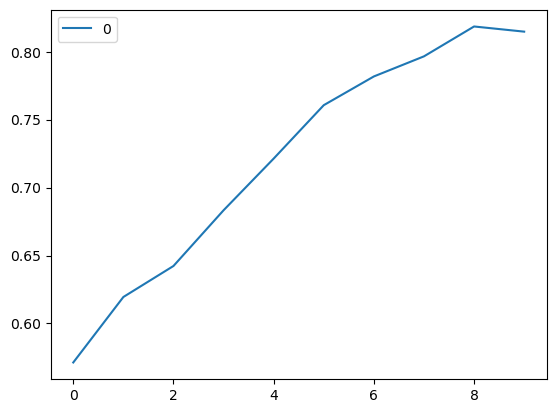

In [39]:
pd.DataFrame(fit_model.history["accuracy"]).plot()

In [40]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - 7ms/step - accuracy: 0.8226 - loss: 0.4087
Loss: 0.4086712598800659, Accuracy: 0.8226351141929626


In [41]:
all_year_data["Ticker"].unique()

array(['AAPL', 'ABBV', 'ADBE', 'AEP', 'AMGN', 'AMT', 'AMZN', 'APD', 'AVB',
       'AXP', 'BAC', 'BA', 'BKNG', 'BP', 'B', 'CAT', 'CL', 'COP', 'COST',
       'CRM', 'CVX', 'C', 'DD', 'DE', 'DLR', 'DUK', 'D', 'ED', 'EQIX',
       'EXC', 'FCX', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IP', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MCD', 'MDLZ', 'META',
       'MMM', 'MRK', 'MRNA', 'MSFT', 'MS', 'NEE', 'NEM', 'NKE', 'NVDA',
       'O', 'PEP', 'PFE', 'PG', 'PLD', 'PM', 'PSA', 'PXD', 'RTX', 'SBUX',
       'SHW', 'SLB', 'SO', 'SPG', 'SRE', 'TSLA', 'UNH', 'UNP', 'VMC',
       'WFC', 'WMT', 'XOM'], dtype=object)

# Adobe 

In [42]:
ADBE_df = all_year_data[all_year_data["Ticker"]=='ADBE']

In [43]:
ADBE_df= ADBE_df.drop("Ticker",axis=1) 

In [44]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

import pandas as pd

# Assuming 'apple_df' contains columns: '2. high', '3. low', '4. close'

def calculate_atr(data, period=14):
    # Calculate the three True Range components
    data['High-Low'] = data['2. high'] - data['3. low']
    data['High-PreviousClose'] = abs(data['2. high'] - data['4. close'].shift(1))
    data['Low-PreviousClose'] = abs(data['3. low'] - data['4. close'].shift(1))
    
    # True Range is the max of the three components
    data['TrueRange'] = data[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    
    # Calculate the ATR as a moving average of the True Range
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()
    
    # Drop intermediate columns used for calculation if no longer needed
    data.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'TrueRange'], inplace=True)
    
    return data

# Applying the indicators to apple_df
calculate_rsi(ADBE_df)
calculate_ppo(ADBE_df)
calculate_roc(ADBE_df)
calculate_williams_r(ADBE_df)
calculate_stochastic(ADBE_df)
calculate_atr(ADBE_df)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-22,496.43,497.3400,488.3600,493.11,493.110000,2388721.0,0.0,1.0,13.040718,1,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2024-10-21,494.60,500.6499,492.9600,497.71,497.710000,1679657.0,0.0,1.0,0.009329,1,NaN,0.074364,NaN,NaN,NaN,NaN,NaN
2024-10-18,491.29,499.0000,491.0501,494.90,494.900000,2011121.0,0.0,1.0,-0.005646,0,NaN,0.086334,NaN,NaN,NaN,NaN,NaN
2024-10-17,506.51,507.5000,495.2300,496.83,496.830000,2769241.0,0.0,1.0,0.003900,1,NaN,0.125873,NaN,NaN,NaN,NaN,NaN
2024-10-16,506.39,506.8400,500.2500,502.54,502.540000,1859116.0,0.0,1.0,0.011493,1,NaN,0.247368,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,71.25,72.0000,69.3800,70.69,17.544766,1705200.0,0.0,1.0,-0.009667,0,40.322581,1.800117,-4.227070,-86.382536,13.617464,18.521137,3.277143
1999-11-04,70.25,71.0000,68.0000,68.88,17.095536,2308500.0,0.0,1.0,-0.025605,0,31.474820,1.260741,-8.233413,-92.000000,8.000000,13.079695,3.361429
1999-11-03,69.06,69.7500,67.5600,68.81,17.078163,1812000.0,0.0,1.0,-0.001016,0,31.934307,0.814366,-7.946488,-89.073427,10.926573,10.848012,3.294286


In [45]:
ADBE_df = ADBE_df.dropna()

In [46]:
X = ADBE_df[['RSI','PPO', 'ROC','Williams_%R', '%K','%D','ATR']]
y = ADBE_df["Binary_Returns"]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [48]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=12, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=4)

Epoch 1/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.5307 - loss: 0.6927
Epoch 2/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.6061 - loss: 0.6681
Epoch 3/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.6343 - loss: 0.6486
Epoch 4/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.6602 - loss: 0.6274


In [51]:
fit_model.history["accuracy"]

[0.5672981142997742,
 0.6149551272392273,
 0.6333001255989075,
 0.6566300988197327]

In [72]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 916us/step - accuracy: 0.8198 - loss: 0.3871
Loss: 0.3870510756969452, Accuracy: 0.819776713848114


In [52]:
all_year_data["Ticker"].unique()

array(['AAPL', 'ABBV', 'ADBE', 'AEP', 'AMGN', 'AMT', 'AMZN', 'APD', 'AVB',
       'AXP', 'BAC', 'BA', 'BKNG', 'BP', 'B', 'CAT', 'CL', 'COP', 'COST',
       'CRM', 'CVX', 'C', 'DD', 'DE', 'DLR', 'DUK', 'D', 'ED', 'EQIX',
       'EXC', 'FCX', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IP', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MCD', 'MDLZ', 'META',
       'MMM', 'MRK', 'MRNA', 'MSFT', 'MS', 'NEE', 'NEM', 'NKE', 'NVDA',
       'O', 'PEP', 'PFE', 'PG', 'PLD', 'PM', 'PSA', 'PXD', 'RTX', 'SBUX',
       'SHW', 'SLB', 'SO', 'SPG', 'SRE', 'TSLA', 'UNH', 'UNP', 'VMC',
       'WFC', 'WMT', 'XOM'], dtype=object)

# American Electric Power

In [53]:
AEP_df = all_year_data[all_year_data["Ticker"]=='AEP']



In [54]:
AEP_df= AEP_df.drop("Ticker",axis=1) 

In [55]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

import pandas as pd

# Assuming 'apple_df' contains columns: '2. high', '3. low', '4. close'

def calculate_atr(data, period=14):
    # Calculate the three True Range components
    data['High-Low'] = data['2. high'] - data['3. low']
    data['High-PreviousClose'] = abs(data['2. high'] - data['4. close'].shift(1))
    data['Low-PreviousClose'] = abs(data['3. low'] - data['4. close'].shift(1))
    
    # True Range is the max of the three components
    data['TrueRange'] = data[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    
    # Calculate the ATR as a moving average of the True Range
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()
    
    # Drop intermediate columns used for calculation if no longer needed
    data.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'TrueRange'], inplace=True)
    
    return data

# Applying the indicators to apple_df
calculate_rsi(AEP_df)
calculate_ppo(AEP_df)
calculate_roc(AEP_df)
calculate_williams_r(AEP_df)
calculate_stochastic(AEP_df)
calculate_atr(AEP_df)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-22,99.67,100.2500,99.21,99.89,99.890000,1981777.0,0.0,1.0,0.456972,1,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2024-10-21,100.78,101.0800,99.66,100.16,100.160000,2548122.0,0.0,1.0,0.002703,1,NaN,0.021558,NaN,NaN,NaN,NaN,NaN
2024-10-18,100.83,100.8400,99.76,100.69,100.690000,3111829.0,0.0,1.0,0.005292,1,NaN,0.080473,NaN,NaN,NaN,NaN,NaN
2024-10-17,101.75,101.8150,100.57,100.91,100.910000,2008881.0,0.0,1.0,0.002185,1,NaN,0.143180,NaN,NaN,NaN,NaN,NaN
2024-10-16,100.10,101.7062,99.86,101.32,101.320000,2695156.0,0.0,1.0,0.004063,1,NaN,0.223204,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,35.00,35.5000,34.94,35.19,11.743637,1661000.0,0.0,1.0,0.021777,1,88.738739,2.042618,10.834646,-8.136483,91.863517,89.554779,0.682857
1999-11-04,35.00,35.1900,34.44,34.75,11.596800,344300.0,0.0,1.0,-0.012504,0,79.957356,2.147499,8.797746,-19.685039,80.314961,86.773168,0.714286
1999-11-03,35.00,35.1300,34.75,35.00,11.680230,637600.0,0.0,1.0,0.007194,1,81.967213,2.262204,9.786700,-14.285714,85.714286,85.964254,0.701429


In [56]:
AEP_df = AEP_df.dropna()

In [57]:
X = AEP_df[['RSI','PPO', 'ROC','Williams_%R', '%K','%D','ATR']]
y = AEP_df["Binary_Returns"]

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [59]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=12, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 12)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.5488 - loss: 0.6876
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6249 - loss: 0.6624
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.6396 - loss: 0.6429
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.6463 - loss: 0.6278
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.6885 - loss: 0.5992
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7145 - loss: 0.5667
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7330 - loss: 0.5407
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7660 - loss: 0.5101
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7852 - loss: 0.4786
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.7986 - loss: 0.4597
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8060 - loss: 0.4383
Epoch 12/25
157/157 ━━━━━━━━━━

In [62]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.8198 - loss: 0.3871
Loss: 0.3870510756969452, Accuracy: 0.819776713848114


# Implementing Py Torch

In [63]:


class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [64]:
# Create the test dataset and loader
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [65]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


train_dataset = CustomDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [66]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Example: defining the model with input, hidden, and output sizes
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1  # Assuming binary classification

model = SimpleNN(input_size, hidden_size, output_size)

In [67]:
criterion = nn.BCELoss()  # Binary cross-entropy for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [68]:
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for data, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(data)  # Forward pass
        loss = criterion(outputs.squeeze(), labels)  # Compute loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


Epoch 1, Loss: 0.6349409127690989
Epoch 2, Loss: 0.41798811030995314
Epoch 3, Loss: 0.40698696919687233
Epoch 4, Loss: 0.40671278071251643
Epoch 5, Loss: 0.4004286812369231
Epoch 6, Loss: 0.40041884200967803
Epoch 7, Loss: 0.3966196600798589
Epoch 8, Loss: 0.39366163797439285
Epoch 9, Loss: 0.3948402907817986
Epoch 10, Loss: 0.39713848320541867
Epoch 11, Loss: 0.4039799794080151
Epoch 12, Loss: 0.3958461901564507
Epoch 13, Loss: 0.39148557698650727
Epoch 14, Loss: 0.3908585875656954
Epoch 15, Loss: 0.3868592035049086
Epoch 16, Loss: 0.39378482198259634
Epoch 17, Loss: 0.38798680455441686
Epoch 18, Loss: 0.3904884830591785
Epoch 19, Loss: 0.4010233384598592
Epoch 20, Loss: 0.38745412724033285
Epoch 21, Loss: 0.39115582064838167
Epoch 22, Loss: 0.3854491816964119
Epoch 23, Loss: 0.38457414023815445
Epoch 24, Loss: 0.3870059818409051
Epoch 25, Loss: 0.38892252505964536
Epoch 26, Loss: 0.3918755659062392
Epoch 27, Loss: 0.39276802530334254
Epoch 28, Loss: 0.3851910339798897
Epoch 29, Loss:

In [69]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        predicted = outputs.round()  # Binary rounding for classification
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


# questions